In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from device import Device
from lorawan import LoRaWAN

# Set device consumption characteristics
# https://www.semtech.com/products/wireless-rf/lora-connect/sx1262
sx1262 = Device()
sx1262.SetTxCurrent(118.0)          # 868~915 MHz/+22dBm
sx1262.SetRxCurrent(5.3)            # DCDC Mode/Rx Boosted, LoRa, 125kHz
sx1262.SetIdleCurrent(0.6)          # RC mode/XOSC off
sx1262.SetSleepCurrent(0.0012)      # Sleep with warm start/RC64k
sx1262.SetVoltage(3.3)

In [ ]:
sf = 10
bw = 125
cr = 1
dataLength = 10
simDurationH = 24*365*10
simDuration = simDurationH * 60*60
print("LoRaWAN Relay - relay uplink simulation - Device Consumption x Application Uplink Periodicity")
print("Simulation Duration [y]:", simDurationH/(24*365))

periodicityS = 86400
periodicityS_array = np.linspace(1, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []

txEpCurr_array = []
rxEpCurr_array = []
sleepEpCurr_array = []
totalEpMeanCon_array = []

txRlN1Curr_array = []
rxRlN1Curr_array = []
sleepRlN1Curr_array = []
totalRlN1MeanCon_array = []

txRlN4Curr_array = []
rxRlN4Curr_array = []
sleepRlN4Curr_array = []
totalRlN4MeanCon_array = []

txRlN8Curr_array = []
rxRlN8Curr_array = []
sleepRlN8Curr_array = []
totalRlN8MeanCon_array = []

txRlN16Curr_array = []
rxRlN16Curr_array = []
sleepRlN16Curr_array = []
totalRlN16MeanCon_array = []

endpoint = LoRaWAN(dataLength, sf, bw, cr)
relay = LoRaWAN(dataLength, sf, bw, cr)
for periodicityS in periodicityS_array:

    periodicityMin_array.append(periodicityS/60)
    periodicityH_array.append(periodicityS/3600)

    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaWAN(periodicityS, dataLength, simDuration)   
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txEpCurr_array.append((tx_mAh/total_mAh)*100)
    rxEpCurr_array.append((rx_mAh/total_mAh)*100)
    sleepEpCurr_array.append((sleep_mAh/total_mAh)*100)
    totalEpMeanCon_array.append((total_mAh/simDurationH)*1000)

    n = 1
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaWAN(periodicityS, dataLength, simDuration, n)   
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txRlN1Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN1Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN1Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN1MeanCon_array.append((total_mAh/simDurationH)*1000)

    n = 4
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaWAN(periodicityS, dataLength, simDuration, n)   
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txRlN4Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN4Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN4Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN4MeanCon_array.append((total_mAh/simDurationH)*1000)

    n = 8
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaWAN(periodicityS, dataLength, simDuration, n)   
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txRlN8Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN8Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN8Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN8MeanCon_array.append((total_mAh/simDurationH)*1000)

    n = 16
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaWAN(periodicityS, dataLength, simDuration, n)   
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txRlN16Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN16Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN16Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN16MeanCon_array.append((total_mAh/simDurationH)*1000)

LoRaWAN Relay - relay uplink simulation - Device Consumption x Application Uplink Periodicity
Simulation Duration [y]: 10.0


/tmp/ipykernel_22461/2984277361.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 1000)


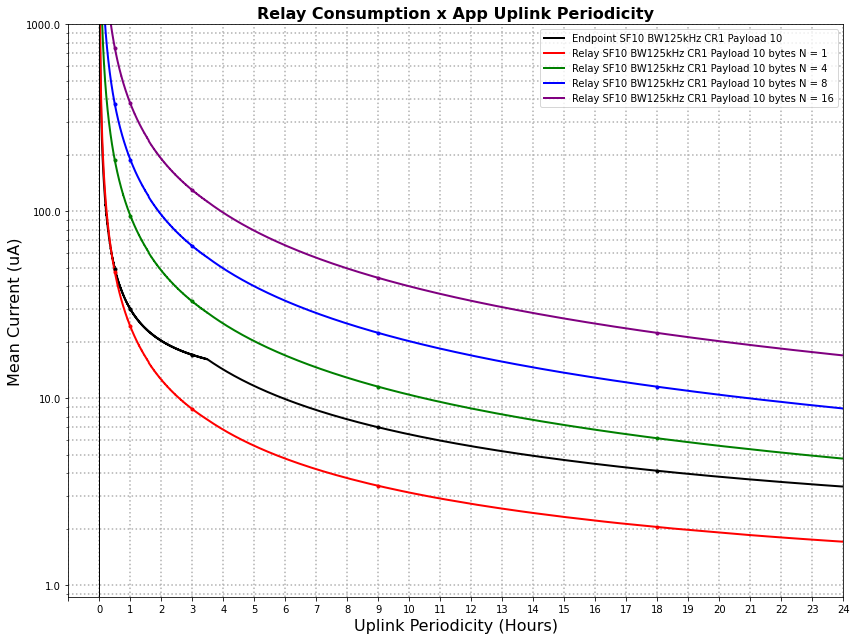

In [3]:
eixo_x = periodicityH_array
eixo_y1 = totalEpMeanCon_array
eixo_y2 = totalRlN1MeanCon_array
eixo_y3 = totalRlN4MeanCon_array
eixo_y4 = totalRlN8MeanCon_array
eixo_y5 = totalRlN16MeanCon_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength}')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 1')
ax.plot(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 4')
ax.plot(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 8')
ax.plot(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 16')
ax.set_title('Relay Consumption x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(0, 1000)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y3_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    y4_m = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y3_m, marker='.', color='green', markersize=6)
    ax.plot(x_m, y4_m, marker='.', color='blue', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
#     ax.text(x_m, y1_m, f'{y1_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='black')
#     ax.text(x_m, y2_m, f'{y2_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='red')
#     ax.text(x_m, y3_m, f'{y3_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='green')
#     ax.text(x_m, y4_m, f'{y4_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='blue')
#     ax.text(x_m, y5_m, f'{y5_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='purple')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# plt.savefig('lorawan_relay_consumption.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

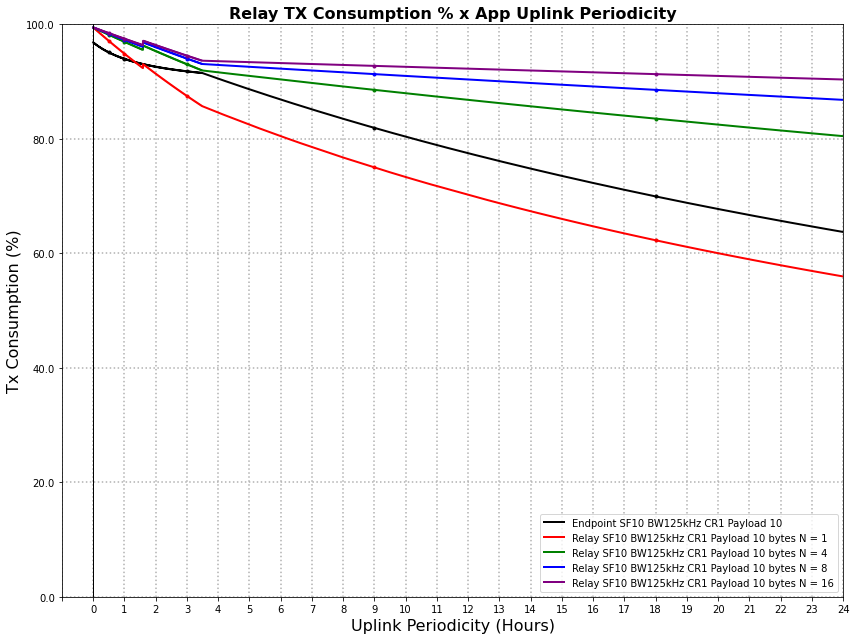

In [4]:
eixo_x = periodicityH_array
eixo_y1 = txEpCurr_array
eixo_y2 = txRlN1Curr_array
eixo_y3 = txRlN4Curr_array
eixo_y4 = txRlN8Curr_array
eixo_y5 = txRlN16Curr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength}')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 1')
ax.plot(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 4')
ax.plot(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 8')
ax.plot(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 16')
ax.set_title('Relay TX Consumption % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Tx Consumption (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y3_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    y4_m = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y3_m, marker='.', color='green', markersize=6)
    ax.plot(x_m, y4_m, marker='.', color='blue', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
#     ax.text(x_m, y1_m, f'{y1_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
#     ax.text(x_m, y2_m, f'{y2_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
#     ax.text(x_m, y3_m, f'{y3_m:.1f}%', fontsize=12, ha='left', va='bottom', color='green')
#     ax.text(x_m, y4_m, f'{y4_m:.1f}%', fontsize=12, ha='left', va='bottom', color='blue')
#     ax.text(x_m, y5_m, f'{y5_m:.1f}%', fontsize=12, ha='left', va='bottom', color='purple')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# plt.savefig('lorawan_relay_consumption.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

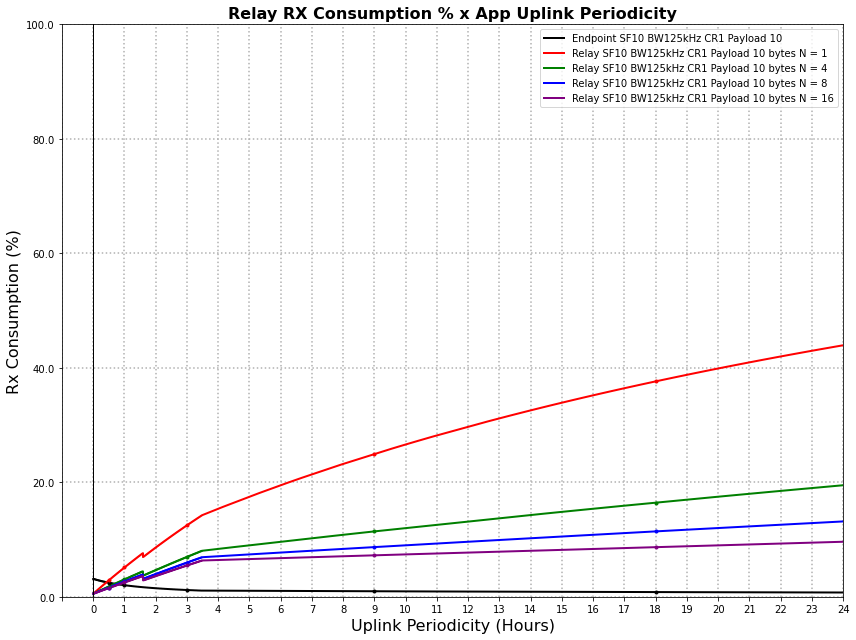

In [5]:
eixo_x = periodicityH_array
eixo_y1 = rxEpCurr_array
eixo_y2 = rxRlN1Curr_array
eixo_y3 = rxRlN4Curr_array
eixo_y4 = rxRlN8Curr_array
eixo_y5 = rxRlN16Curr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength}')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 1')
ax.plot(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 4')
ax.plot(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 8')
ax.plot(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 16')
ax.set_title('Relay RX Consumption % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Rx Consumption (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y3_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    y4_m = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y3_m, marker='.', color='green', markersize=6)
    ax.plot(x_m, y4_m, marker='.', color='blue', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
#     ax.text(x_m, y1_m, f'{y1_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
#     ax.text(x_m, y2_m, f'{y2_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
#     ax.text(x_m, y3_m, f'{y3_m:.1f}%', fontsize=12, ha='left', va='bottom', color='green')
#     ax.text(x_m, y4_m, f'{y4_m:.1f}%', fontsize=12, ha='left', va='bottom', color='blue')
#     ax.text(x_m, y5_m, f'{y5_m:.1f}%', fontsize=12, ha='left', va='bottom', color='purple')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# plt.savefig('lorawan_relay_consumption.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

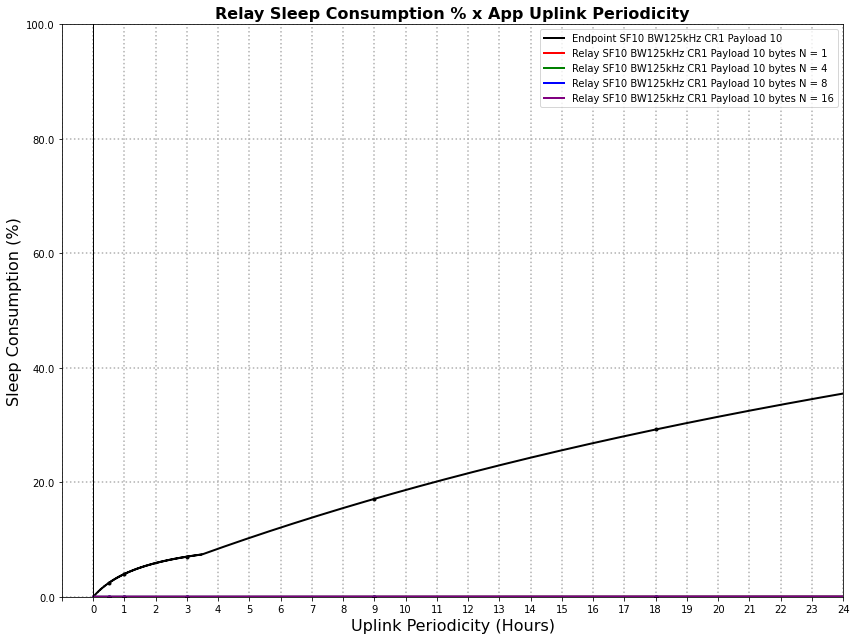

In [6]:
eixo_x = periodicityH_array
eixo_y1 = sleepEpCurr_array
eixo_y2 = sleepRlN1Curr_array
eixo_y3 = sleepRlN4Curr_array
eixo_y4 = sleepRlN8Curr_array
eixo_y5 = sleepRlN16Curr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength}')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 1')
ax.plot(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 4')
ax.plot(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 8')
ax.plot(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 16')
ax.set_title('Relay Sleep Consumption % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Sleep Consumption (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y3_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    y4_m = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y3_m, marker='.', color='green', markersize=6)
    ax.plot(x_m, y4_m, marker='.', color='blue', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
#     ax.text(x_m, y1_m, f'{y1_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
#     ax.text(x_m, y2_m, f'{y2_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
#     ax.text(x_m, y3_m, f'{y3_m:.1f}%', fontsize=12, ha='left', va='bottom', color='green')
#     ax.text(x_m, y4_m, f'{y4_m:.1f}%', fontsize=12, ha='left', va='bottom', color='blue')
#     ax.text(x_m, y5_m, f'{y5_m:.1f}%', fontsize=12, ha='left', va='bottom', color='purple')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# plt.savefig('lorawan_relay_consumption.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

In [7]:
sf = 12
bw = 125
cr = 1
dataLength = 10
simDurationH = 24*365*10
simDuration = simDurationH * 60*60
print("LoRaWAN Relay - relay uplink simulation - Device Consumption x Application Uplink Periodicity")
print("Simulation Duration [y]:", simDurationH/(24*365))

N = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
periodicityS = 3600

txRl1Time = []
rxRl1Time = []
sleepRl1Time = []
txRl1Curr_array = []
rxRl1Curr_array = []
sleepRl1Curr_array = []
totalRl1MeanCon_array = []

txRl3Time = []
rxRl3Time = []
sleepRl3Time = []
txRl3Curr_array = []
rxRl3Curr_array = []
sleepRl3Curr_array = []
totalRl3MeanCon_array = []

txRl6Time = []
rxRl6Time = []
sleepRl6Time = []
txRl6Curr_array = []
rxRl6Curr_array = []
sleepRl6Curr_array = []
totalRl6MeanCon_array = []

txRl9Time = []
rxRl9Time = []
sleepRl9Time = []
txRl9Curr_array = []
rxRl9Curr_array = []
sleepRl9Curr_array = []
totalRl9MeanCon_array = []

txRl12Time = []
rxRl12Time = []
sleepRl12Time = []
txRl12Curr_array = []
rxRl12Curr_array = []
sleepRl12Curr_array = []
totalRl12MeanCon_array = []

txRl24Time = []
rxRl24Time = []
sleepRl24Time = []
txRl24Curr_array = []
rxRl24Curr_array = []
sleepRl24Curr_array = []
totalRl24MeanCon_array = []

relay = LoRaWAN(dataLength, sf, bw, cr)
for n in N:
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaWAN(periodicityS, dataLength, simDuration, n)
    txRl1Time.append((txTime/simDuration)*100)
    rxRl1Time.append((txTime/simDuration)*100)
    sleepRl1Time.append((sleepTime/simDuration)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txRl1Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl1Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl1Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl1MeanCon_array.append((total_mAh/simDurationH)*1000)

    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaWAN(periodicityS*3, dataLength, simDuration, n) 
    txRl3Time.append((txTime/simDuration)*100)
    rxRl3Time.append((rxTime/simDuration)*100)
    sleepRl3Time.append((sleepTime/simDuration)*100)  
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txRl3Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl3Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl3Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl3MeanCon_array.append((total_mAh/simDurationH)*1000)

    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaWAN(periodicityS*6, dataLength, simDuration, n)   
    txRl6Time.append((txTime/simDuration)*100)
    rxRl6Time.append((rxTime/simDuration)*100)
    sleepRl6Time.append((sleepTime/simDuration)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txRl6Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl6Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl6Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl6MeanCon_array.append((total_mAh/simDurationH)*1000)

    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaWAN(periodicityS*9, dataLength, simDuration, n)   
    txRl9Time.append((txTime/simDuration)*100)
    rxRl9Time.append((rxTime/simDuration)*100)
    sleepRl9Time.append((sleepTime/simDuration)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txRl9Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl9Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl9Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl9MeanCon_array.append((total_mAh/simDurationH)*1000)

    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaWAN(periodicityS*12, dataLength, simDuration, n)   
    txRl12Time.append((txTime/simDuration)*100)
    rxRl12Time.append((rxTime/simDuration)*100)
    sleepRl12Time.append((sleepTime/simDuration)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txRl12Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl12Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl12Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl12MeanCon_array.append((total_mAh/simDurationH)*1000)

    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaWAN(periodicityS*24, dataLength, simDuration, n)   
    txRl24Time.append((txTime/simDuration)*100)
    rxRl24Time.append((rxTime/simDuration)*100)
    sleepRl24Time.append((sleepTime/simDuration)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txRl24Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl24Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl24Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl24MeanCon_array.append((total_mAh/simDurationH)*1000)

LoRaWAN Relay - relay uplink simulation - Device Consumption x Application Uplink Periodicity
Simulation Duration [y]: 10.0


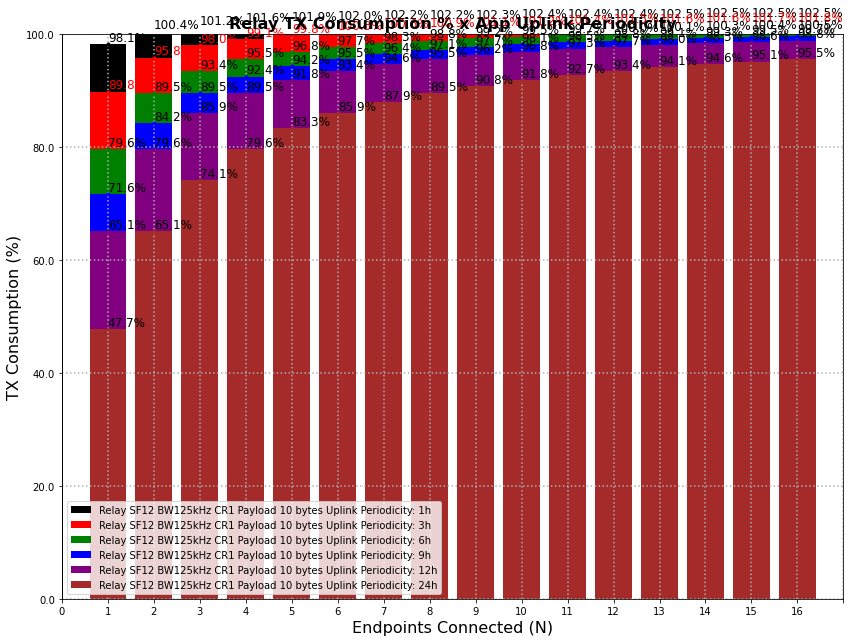

In [8]:
eixo_x = N
eixo_y1 = txRl1Curr_array
eixo_y2 = txRl3Curr_array
eixo_y3 = txRl6Curr_array
eixo_y4 = txRl9Curr_array
eixo_y5 = txRl12Curr_array
eixo_y6 = txRl24Curr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.bar(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 1h')
ax.bar(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 3h')
ax.bar(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 6h')
ax.bar(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 9h')
ax.bar(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 12h')
ax.bar(eixo_x, eixo_y6, color='brown', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 24h')
ax.set_title('Relay TX Consumption % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Endpoints Connected (N)', fontsize=16)
ax.set_ylabel('TX Consumption (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(0, 17)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 or x == 17 else f'{int(x)}'))

for x_m in N:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y3_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    y4_m = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    y6_m = np.interp(x_m, eixo_x, eixo_y6)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y3_m, marker='.', color='green', markersize=6)
    ax.plot(x_m, y4_m, marker='.', color='blue', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
    ax.plot(x_m, y6_m, marker='.', color='brown', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y2_m, f'{y2_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
    ax.text(x_m, y3_m, f'{y3_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y4_m, f'{y4_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y5_m, f'{y5_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y6_m, f'{y6_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# plt.savefig('lorawan_relay_consumption.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

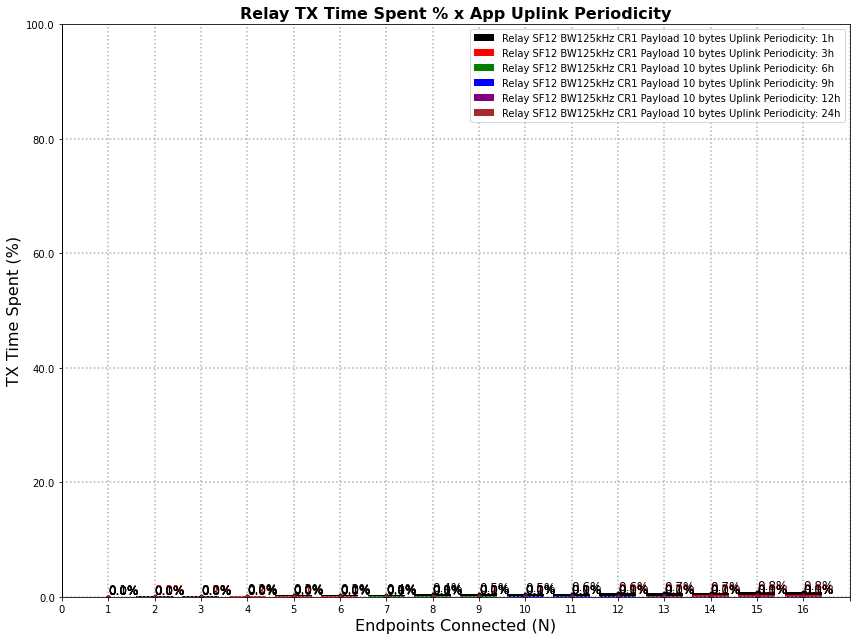

In [9]:
eixo_x = N
eixo_y1 = txRl1Time
eixo_y2 = txRl3Time
eixo_y3 = txRl6Time
eixo_y4 = txRl9Time
eixo_y5 = txRl12Time
eixo_y6 = txRl24Time

fig, ax = plt.subplots(figsize=(12, 9))
ax.bar(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 1h')
ax.bar(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 3h')
ax.bar(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 6h')
ax.bar(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 9h')
ax.bar(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 12h')
ax.bar(eixo_x, eixo_y6, color='brown', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 24h')
ax.set_title('Relay TX Time Spent % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Endpoints Connected (N)', fontsize=16)
ax.set_ylabel('TX Time Spent (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(0, 17)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 or x == 17 else f'{int(x)}'))

for x_m in N:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y3_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    y4_m = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    y6_m = np.interp(x_m, eixo_x, eixo_y6)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y3_m, marker='.', color='green', markersize=6)
    ax.plot(x_m, y4_m, marker='.', color='blue', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
    ax.plot(x_m, y6_m, marker='.', color='brown', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y2_m, f'{y2_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
    ax.text(x_m, y3_m, f'{y3_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y4_m, f'{y4_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y5_m, f'{y5_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y6_m, f'{y6_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# plt.savefig('lorawan_relay_consumption.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

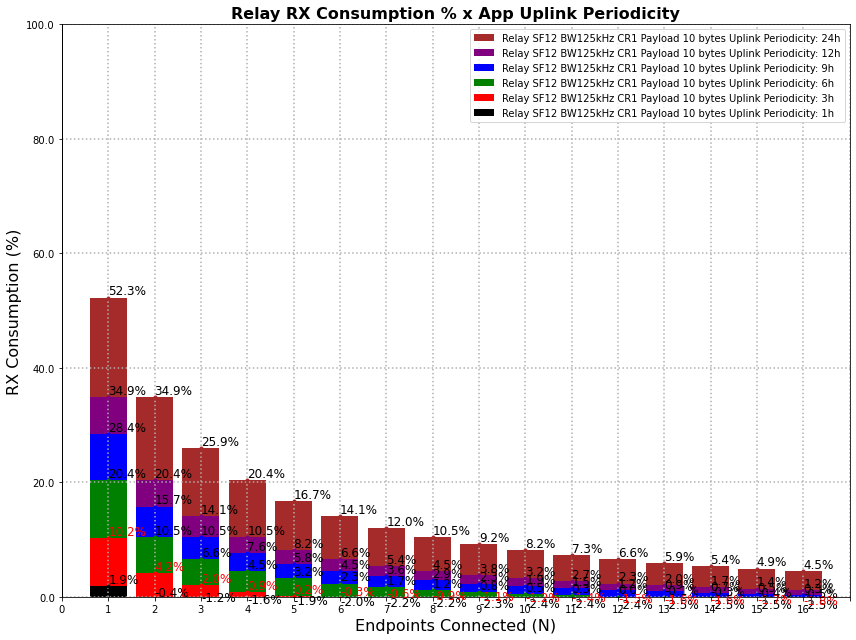

In [10]:
eixo_x = N
eixo_y1 = rxRl1Curr_array
eixo_y2 = rxRl3Curr_array
eixo_y3 = rxRl6Curr_array
eixo_y4 = rxRl9Curr_array
eixo_y5 = rxRl12Curr_array
eixo_y6 = rxRl24Curr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.bar(eixo_x, eixo_y6, color='brown', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 24h')
ax.bar(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 12h')
ax.bar(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 9h')
ax.bar(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 6h')
ax.bar(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 3h')
ax.bar(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 1h')
ax.set_title('Relay RX Consumption % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Endpoints Connected (N)', fontsize=16)
ax.set_ylabel('RX Consumption (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(0, 17)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 or x == 17 else f'{int(x)}'))

for x_m in N:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y3_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    y4_m = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    y6_m = np.interp(x_m, eixo_x, eixo_y6)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y3_m, marker='.', color='green', markersize=6)
    ax.plot(x_m, y4_m, marker='.', color='blue', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
    ax.plot(x_m, y6_m, marker='.', color='brown', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y2_m, f'{y2_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
    ax.text(x_m, y3_m, f'{y3_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y4_m, f'{y4_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y5_m, f'{y5_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y6_m, f'{y6_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# plt.savefig('lorawan_relay_consumption.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

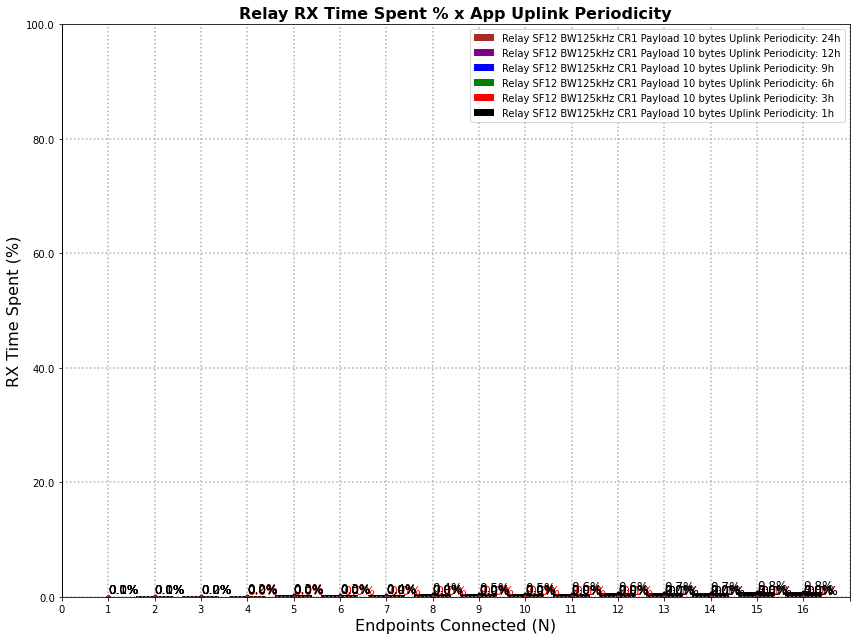

In [11]:
eixo_x = N
eixo_y1 = rxRl1Time
eixo_y2 = rxRl3Time
eixo_y3 = rxRl6Time
eixo_y4 = rxRl9Time
eixo_y5 = rxRl12Time
eixo_y6 = rxRl24Time

fig, ax = plt.subplots(figsize=(12, 9))
ax.bar(eixo_x, eixo_y6, color='brown', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 24h')
ax.bar(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 12h')
ax.bar(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 9h')
ax.bar(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 6h')
ax.bar(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 3h')
ax.bar(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 1h')

ax.set_title('Relay RX Time Spent % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Endpoints Connected (N)', fontsize=16)
ax.set_ylabel('RX Time Spent (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(0, 17)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 or x == 17 else f'{int(x)}'))

for x_m in N:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y3_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    y4_m = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    y6_m = np.interp(x_m, eixo_x, eixo_y6)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y3_m, marker='.', color='green', markersize=6)
    ax.plot(x_m, y4_m, marker='.', color='blue', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
    ax.plot(x_m, y6_m, marker='.', color='brown', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y2_m, f'{y2_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
    ax.text(x_m, y3_m, f'{y3_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y4_m, f'{y4_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y5_m, f'{y5_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y6_m, f'{y6_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# plt.savefig('lorawan_relay_consumption.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

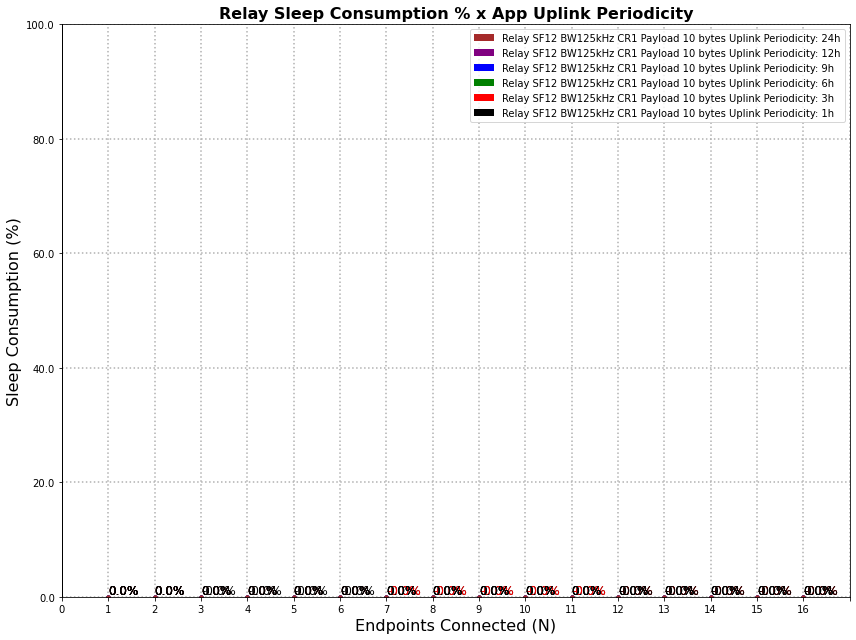

In [12]:
eixo_x = N
eixo_y1 = sleepRl1Curr_array
eixo_y2 = sleepRl3Curr_array
eixo_y3 = sleepRl6Curr_array
eixo_y4 = sleepRl9Curr_array
eixo_y5 = sleepRl12Curr_array
eixo_y6 = sleepRl24Curr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.bar(eixo_x, eixo_y6, color='brown', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 24h')
ax.bar(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 12h')
ax.bar(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 9h')
ax.bar(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 6h')
ax.bar(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 3h')
ax.bar(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 1h')
ax.set_title('Relay Sleep Consumption % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Endpoints Connected (N)', fontsize=16)
ax.set_ylabel('Sleep Consumption (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(0, 17)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 or x == 17 else f'{int(x)}'))

for x_m in N:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y3_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    y4_m = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    y6_m = np.interp(x_m, eixo_x, eixo_y6)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y3_m, marker='.', color='green', markersize=6)
    ax.plot(x_m, y4_m, marker='.', color='blue', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
    ax.plot(x_m, y6_m, marker='.', color='brown', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y2_m, f'{y2_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
    ax.text(x_m, y3_m, f'{y3_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y4_m, f'{y4_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y5_m, f'{y5_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y6_m, f'{y6_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# plt.savefig('lorawan_relay_consumption.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

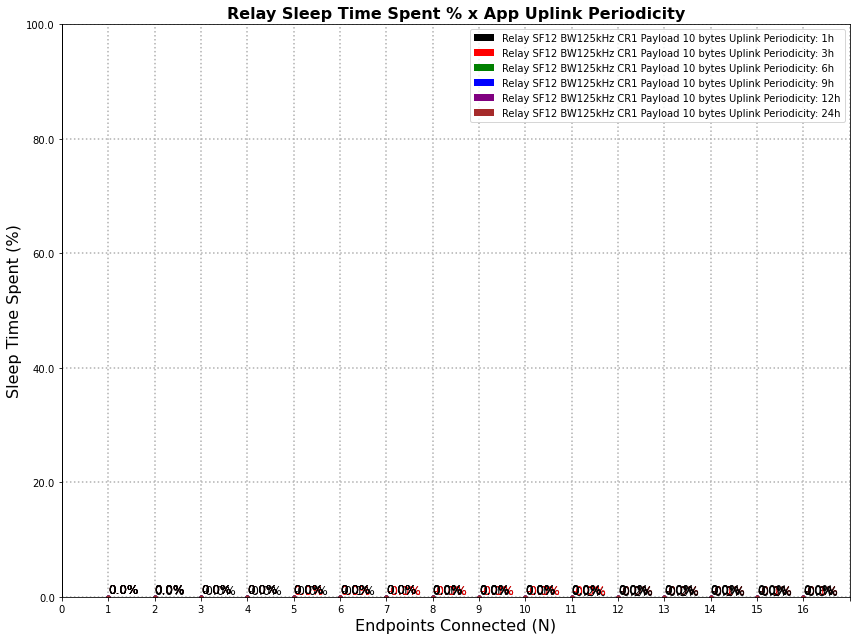

In [13]:
eixo_x = N
eixo_y1 = sleepRl1Time
eixo_y2 = sleepRl3Time
eixo_y3 = sleepRl6Time
eixo_y4 = sleepRl9Time
eixo_y5 = sleepRl12Time
eixo_y6 = sleepRl24Time

fig, ax = plt.subplots(figsize=(12, 9))
ax.bar(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 1h')
ax.bar(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 3h')
ax.bar(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 6h')
ax.bar(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 9h')
ax.bar(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 12h')
ax.bar(eixo_x, eixo_y6, color='brown', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 24h')
ax.set_title('Relay Sleep Time Spent % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Endpoints Connected (N)', fontsize=16)
ax.set_ylabel('Sleep Time Spent (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(0, 17)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 or x == 17 else f'{int(x)}'))

for x_m in N:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y3_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    y4_m = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    y6_m = np.interp(x_m, eixo_x, eixo_y6)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y3_m, marker='.', color='green', markersize=6)
    ax.plot(x_m, y4_m, marker='.', color='blue', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
    ax.plot(x_m, y6_m, marker='.', color='brown', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y2_m, f'{y2_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
    ax.text(x_m, y3_m, f'{y3_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y4_m, f'{y4_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y5_m, f'{y5_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.text(x_m, y6_m, f'{y6_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# plt.savefig('lorawan_relay_consumption.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()